In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.layers import Activation, LSTM, Dense
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import pandas as pd

data = pd.read_csv('aahaber.csv',engine='python',sep = ';')

sentences_training = data.iloc[:,2]
data_label = data.iloc[:,1]

Using TensorFlow backend.
C:\Users\Merve\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Merve\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Merve\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Merve\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
words = []
for i in sentences_training:
    words.append(i.split())

In [3]:
from gensim.models.word2vec import Word2Vec
word2vec_model = Word2Vec(words, size = 200, window = 5, min_count = 1, workers = 16, sample=0.01,  min_alpha=0.0001, negative=0)

token = Tokenizer()
token.fit_on_texts(sentences_training)
x = token.texts_to_sequences(sentences_training)
x = pad_sequences(x)

scaler = StandardScaler()
x = scaler.fit_transform(x)

encode = preprocessing.LabelEncoder()
y = encode.fit_transform(data_label)
y = to_categorical(y)
print(y)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [5]:
model = Sequential()
model.add(word2vec_model.wv.get_keras_embedding(True))
model.add(LSTM(units=128))
model.add(Dense(8, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=128, epochs=25, validation_data=(x_test, y_test))

scores = model.evaluate(x_test, y_test, verbose = 0)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 15999 samples, validate on 4000 samples
Epoch 1/25
15999/15999 [==============================] - 695s 43ms/step - loss: 0.3984 - accuracy: 0.8711 - val_loss: 0.3769 - val_accuracy: 0.8750
Epoch 2/25
15999/15999 [==============================] - 723s 45ms/step - loss: 0.3753 - accuracy: 0.8750 - val_loss: 0.3689 - val_accuracy: 0.8750
Epoch 3/25
15999/15999 [==============================] - 698s 44ms/step - loss: 0.3684 - accuracy: 0.8752 - val_loss: 0.3521 - val_accuracy: 0.8753
Epoch 4/25
15999/15999 [==============================] - 729s 46ms/step - loss: 0.3229 - accuracy: 0.8773 - val_loss: 0.3081 - val_accuracy: 0.8800
Epoch 5/25
15999/15999 [==============================] - 737s 46ms/step - loss: 0.3234 - accuracy: 0.8784 - val_loss: 0.3358 - val_accuracy: 0.8766
Epoch 6/25
15999/15999 [==============================] - 737s 46ms/step - loss: 0.313

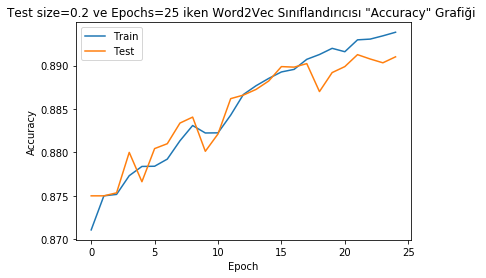

In [6]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Test size=0.2 ve Epochs=25 iken Word2Vec Sınıflandırıcısı "Accuracy" Grafiği ')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

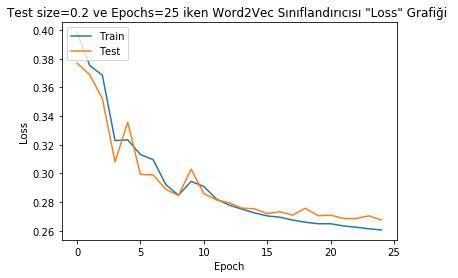

In [7]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Test size=0.2 ve Epochs=25 iken Word2Vec Sınıflandırıcısı "Loss" Grafiği ')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state = 0)

In [9]:
model = Sequential()
model.add(word2vec_model.wv.get_keras_embedding(True))
model.add(LSTM(units=128))
model.add(Dense(8, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=128, epochs=25, validation_data=(x_test, y_test))

scores = model.evaluate(x_test, y_test, verbose = 0)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Train on 9999 samples, validate on 10000 samples
Epoch 1/25
9999/9999 [==============================] - 533s 53ms/step - loss: 0.4125 - accuracy: 0.8712 - val_loss: 0.3776 - val_accuracy: 0.8750
Epoch 2/25
9999/9999 [==============================] - 462s 46ms/step - loss: 0.3775 - accuracy: 0.8750 - val_loss: 0.3772 - val_accuracy: 0.8750
Epoch 3/25
9999/9999 [==============================] - 459s 46ms/step - loss: 0.3766 - accuracy: 0.8750 - val_loss: 0.3757 - val_accuracy: 0.8750
Epoch 4/25
9999/9999 [==============================] - 483s 48ms/step - loss: 0.3679 - accuracy: 0.8752 - val_loss: 0.3498 - val_accuracy: 0.8757
Epoch 5/25
9999/9999 [==============================] - 504s 50ms/step - loss: 0.3537 - accuracy: 0.8754 - val_loss: 0.3317 - val_accuracy: 0.8760
Epoch 6/25
9999/9999 [==============================] - 465s 47ms/step - loss: 0.3169 - accuracy: 0.8779 - val_loss: 0.3181 - val_accuracy: 0.8792
Epoch 7/25
9999/9999 [==============================] - 532s 53ms/ste

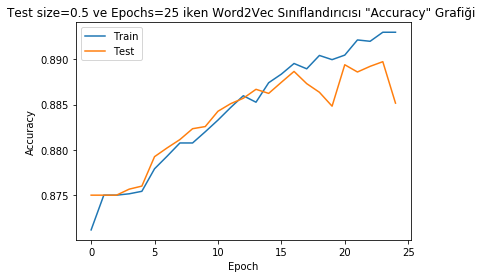

In [10]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Test size=0.5 ve Epochs=25 iken Word2Vec Sınıflandırıcısı "Accuracy" Grafiği ')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

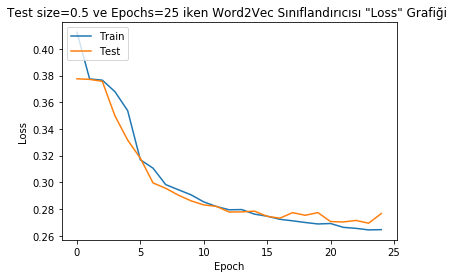

In [11]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Test size=0.5 ve Epochs=25 iken Word2Vec Sınıflandırıcısı "Loss" Grafiği ')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.7, random_state = 0)

In [13]:
model = Sequential()
model.add(word2vec_model.wv.get_keras_embedding(True))
model.add(LSTM(units=128))
model.add(Dense(8, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=128, epochs=25, validation_data=(x_test, y_test))

scores = model.evaluate(x_test, y_test, verbose = 0)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Train on 5999 samples, validate on 14000 samples
Epoch 1/25
5999/5999 [==============================] - 345s 58ms/step - loss: 0.4356 - accuracy: 0.8659 - val_loss: 0.3778 - val_accuracy: 0.8750
Epoch 2/25
5999/5999 [==============================] - 386s 64ms/step - loss: 0.3774 - accuracy: 0.8750 - val_loss: 0.3776 - val_accuracy: 0.8750
Epoch 3/25
5999/5999 [==============================] - 376s 63ms/step - loss: 0.3770 - accuracy: 0.8750 - val_loss: 0.3774 - val_accuracy: 0.8750
Epoch 4/25
5999/5999 [==============================] - 360s 60ms/step - loss: 0.3763 - accuracy: 0.8750 - val_loss: 0.3754 - val_accuracy: 0.8750
Epoch 5/25
5999/5999 [==============================] - 351s 58ms/step - loss: 0.3732 - accuracy: 0.8750 - val_loss: 0.3679 - val_accuracy: 0.8750
Epoch 6/25
5999/5999 [==============================] - 348s 58ms/step - loss: 0.3513 - accuracy: 0.8752 - val_loss: 0.3396 - val_accuracy: 0.8753
Epoch 7/25
5999/5999 [==============================] - 357s 59ms/ste

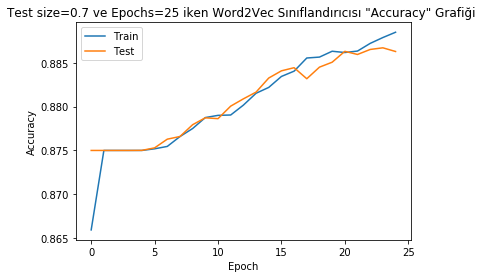

In [14]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Test size=0.7 ve Epochs=25 iken Word2Vec Sınıflandırıcısı "Accuracy" Grafiği ')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

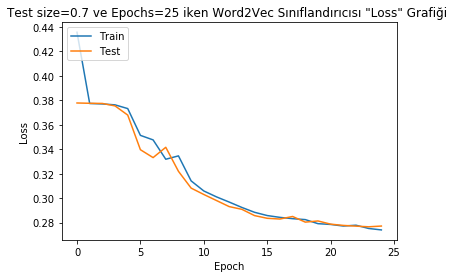

In [15]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Test size=0.7 ve Epochs=25 iken Word2Vec Sınıflandırıcısı "Loss" Grafiği ')
plt.legend(['Train','Test'], loc='upper left')
plt.show()